In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [10]:
raw_train = pd.read_csv('train.csv')
raw_test = pd.read_csv('test.csv')
raw_test['SalePrice'] = -1

houses = pd.concat([raw_train, raw_test])
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
scaler = StandardScaler()
is_fit = False

## EDA (Explanatory Data Analysis)

### Qualitative
MSZoning, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, Foundation, BsmtFinType1, BsmtFinType2, Heating, Electrical, GarageType, MiscFeature, SaleType, SaleCondition

***drop***: Street, Alley, Utilities

***evaluation***: BsmtQual, BsmtCond, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond, PoolQC, Functional, Fence, BsmtExposure, ExterCond

***boolean***: CentralAir, GarageFinish, PavedDrive

### Quantitative
MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold

In [12]:
def illustrate_heatmap(data):
    plt.figure(figsize=[30,15])
    sns.heatmap(data.corr(), annot=True)

def illustrate(data):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
    ax1.scatter(data['SalePrice'], data['LotShape'])
    ax1.set_title('Price and LotShape')
#     ax2.scatter(data['SalePrice'], data['Street'])
#     ax2.set_title('Price and Street')
    
    plt.show()

In [41]:
def preprocess(data):
    global is_fit
#     data = data.drop(['Id', 'Street', 'Alley', 'Utilities'], axis=1)
#     Will not drop GarageYrBlt if training is not ok
    data = data.drop([
        'Id',
        '1stFlrSF',
        '2ndFlrSF',
        'GarageArea',
        'LotFrontage',
        'GarageYrBlt',
        'Alley',
        'MiscFeature',
        'Fence'
    ], axis=1)
    
#     Poor, Fair, Typical, Good, Excellent
    evaluation1 = {
        None: 0,
        'Po': 1,
        'Fa': 2,
        'TA': 3,
        'Gd': 4,
        'Ex': 5
    }
    evaluation1Features = [
        'ExterQual',
        'BsmtQual',
        'BsmtCond',
        'HeatingQC',
        'KitchenQual',
        'FireplaceQu',
        'GarageQual',
        'GarageCond',
        'PoolQC'
    ]
    for feature in evaluation1Features:
        data[feature] = data[feature].map(evaluation1)
    
#     NA, No, Mn, Av, Gd
    evaluation2 = {
        None: 0,
        'No': 1,
        'Mn': 2,
        'Av': 3,
        'Gd': 4,
    }
    data['BsmtExposure'] = data['BsmtExposure'].map(evaluation2)
    data['CentralAir'] = data['CentralAir'].map({'Y': 1, 'N': 0})
    data['PavedDrive'] = data['PavedDrive'].map({'P': 2, 'Y': 1, 'N': 0})
    
    data['BsmtUnfSF'] = data.groupby('Neighborhood')['BsmtUnfSF'].transform(lambda x: x.fillna(x.median()))
    data['TotalBsmtSF'] = data.groupby('Neighborhood')['TotalBsmtSF'].transform(lambda x: x.fillna(x.median()))
    data['BsmtFinSF1'] = data.groupby('Neighborhood')['BsmtFinSF1'].transform(lambda x: x.fillna(x.median()))
    data['BsmtFinSF2'] = data.groupby('Neighborhood')['BsmtFinSF2'].transform(lambda x: x.fillna(x.median()))
    data['BsmtFullBath'] = data.groupby('Neighborhood')['BsmtFullBath'].transform(lambda x: x.fillna(x.median()))
    data['BsmtHalfBath'] = data.groupby('Neighborhood')['BsmtHalfBath'].transform(lambda x: x.fillna(x.median()))
    data['MasVnrArea'] = data.groupby('Neighborhood')['MasVnrArea'].transform(lambda x: x.fillna(x.median()))
    data['GarageCars'] = data.groupby('Neighborhood')['GarageCars'].transform(lambda x: x.fillna(x.median()))
#     data = data.dropna()
    data = pd.get_dummies(data, drop_first=True)
    
    if 'SalePrice' in data:
        y = data['SalePrice']
        X = data.drop(['SalePrice'], axis=1)
    else:
        y = None
        X = data
    
    if is_fit == False:
        scaler.fit(X)
        is_fit = True
        
    X_scaled = scaler.transform(X)
    
    y = y[y != -1]
    X_test_set = X_scaled[len(y):]
    X_scaled = X_scaled[0:len(y)]
        
    return X_scaled, y, X_test_set

In [42]:
data = houses.copy()

# print(data['BsmtFinSF1'].value_counts())
X_scaled, y, X_test_set = preprocess(data)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, shuffle=False)

In [43]:
model = Lasso(alpha =0.001, random_state=1, tol=11)
model.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=11, warm_start=False)

In [44]:
pred = model.predict(X_test)

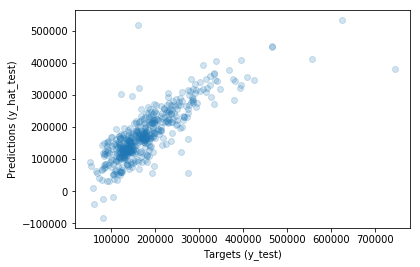

In [45]:
plt.scatter(y_test, pred, alpha=0.2)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_hat_test)')
plt.show()

In [47]:
predictions = model.predict(X_test_set)

In [48]:
data = pd.DataFrame({'Id': raw_test['Id'], 'SalePrice': predictions})

In [49]:
data.to_csv('result.csv', index=False)

In [61]:
from sklearn.metrics import mean_squared_log_error

np.sqrt(mean_squared_log_error(np.float64(y_test), pred))

/Users/tailtq/opt/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/sklearn/metrics/regression.py:314: RuntimeWarning: invalid value encountered in log
  return mean_squared_error(np.log(y_true + 1), np.log(y_pred + 1),


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').